# 1. Setup
   

https://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf

## 1.1 Install dependencies
   

In [ ]:
# %pip install tensorflow opencv-python matplotlib

## 1.2 Import dependencies
   

In [2]:
# import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

Here's a concise rundown of how we'll harness these libraries:

- `cv2`: This library, often known as OpenCV, is our go-to for adept image manipulation.
- `os`: Our partner in managing directories, making it simpler to navigate and organize our files.
- `random`: Vital for randomization, an essential aspect in machine learning.
- `numpy`: The cornerstone for manipulating tensors, an indispensable part of our work.
- `matplotlib`: A trusted ally for presenting images visually in our project.

In [3]:
# import tensorflow dependencies
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf


Our project takes on a siamese network approach, facilitating the comparison of two images for verification. By assessing the similarity between these images, our network will categorize them as matching (output: 1) or non-matching (output: 0). We'll orchestrate this using the `Model` class for model creation, custom layers for designing intricate components, `Conv2D` for convolutional operations, `Dense` for connecting layers, `MaxPooling2D` for dimensionality reduction, and `Flatten` to convert two-dimensional data into vectors.


![Opera Snapshot_2023-08-25_132451_www.cs.cmu.edu.png](<attachment:Opera Snapshot_2023-08-25_132451_www.cs.cmu.edu.png>)
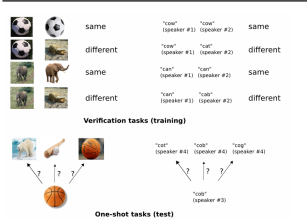

## 1.3 Create folder structures
   


In this phase, we'll arrange our data into distinct folders to ensure an organized approach to our project:

In [4]:
#setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

Here's a concise summary of this step:

- **Positive Folder**: Reserved for images that match.
- **Negative Folder**: Dedicated to images that do not match.
- **Anchor Folder**: Home to real-time images.

In [5]:
# make the directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

# 2. Collect Positives and Anchors


use this link to download labeled images http://vis-www.cs.umass.edu/lfw/lfw.tgz

copy-paste the zipped folder into your machine learning folder



## 2.1 Unzip Labeled Faces in the Wild Dataset


If you've used the IDM downloader and it's managed by WinRAR, you can utilize the "Extract to LFW folder" option. In case this doesn't work and you encounter a scenario where extraction results in a file with no extension, you can employ 7-Zip for the extraction process.

In [7]:
# uncompress tar labeled faces in the wild dataset
!tar -xf lfw.tgz

tar: Error opening archive: Failed to open 'lfw.tgz'


Once the extraction is complete, you'll find that each folder within the "lfw" directory holds at least one labeled image. Our goal is to extract these images from their respective folders and relocate them to the "data/negative" directory.

The process involves iterating through all the directories inside "lfw" and for each directory, iterating through the images within it. We'll then move these images to the "data/negative" directory.


In [13]:
# move lfw images to the respective repository ie data/negative
for dir in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', dir)):
        EX_PATH = os.path.join('lfw', dir, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)
        print(f'{file} is done')


Aaron_Eckhart_0001.jpg is done
Aaron_Guiel_0001.jpg is done
Aaron_Patterson_0001.jpg is done
Aaron_Peirsol_0001.jpg is done
Aaron_Peirsol_0002.jpg is done
Aaron_Peirsol_0003.jpg is done
Aaron_Peirsol_0004.jpg is done
Aaron_Pena_0001.jpg is done
Aaron_Sorkin_0001.jpg is done
Aaron_Sorkin_0002.jpg is done
Aaron_Tippin_0001.jpg is done
Abbas_Kiarostami_0001.jpg is done
Abba_Eban_0001.jpg is done
Abdel_Aziz_Al-Hakim_0001.jpg is done
Abdel_Madi_Shabneh_0001.jpg is done
Abdel_Nasser_Assidi_0001.jpg is done
Abdel_Nasser_Assidi_0002.jpg is done
Abdoulaye_Wade_0001.jpg is done
Abdoulaye_Wade_0002.jpg is done
Abdoulaye_Wade_0003.jpg is done
Abdoulaye_Wade_0004.jpg is done
Abdulaziz_Kamilov_0001.jpg is done
Abdullah_0001.jpg is done
Abdullah_0002.jpg is done
Abdullah_0003.jpg is done
Abdullah_0004.jpg is done
Abdullah_Ahmad_Badawi_0001.jpg is done
Abdullah_al-Attiyah_0001.jpg is done
Abdullah_al-Attiyah_0002.jpg is done
Abdullah_al-Attiyah_0003.jpg is done
Abdullah_Gul_0001.jpg is done
Abdullah_G

Breaking down the steps taken:

1. We loop through each folder in the "lfw" directory.
2. For each folder, we loop through all images in that folder.
3. We create a variable to store the original image's path, for instance, 'lfw\Aaron_Eckhart\Aaron_Eckhart_0001.jpg'.
4. We create a path to store the new location of the image, such as 'data\negative\Aaron_Eckhart_0001.jpg'.
5. We utilize `os.replace` to actually move the image to its new location.

As a result of these steps, the "lfw" directory will be empty, and the "data/negative" directory will be populated with the images we've moved.


## 2.2 Collect Positive and Anchor Classes
